# Sentiment Classification of Yelp Reviews

Hongpeng Jin &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
469-543-7960 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
hopenjin@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
linkedin.com/in/hongpeng-jin/

Goal: predict the customer sentiment using their review text <br />
Data: Yelp Dataset Challenge <br />
GitHub: https://github.com/hopenjin/DataProject/blob/master/Hongpeng%20Jin_Project_Sentiment%20Classification%20of%20Yelp%20Reviews.ipynb

## 1. First of all, Data processing!!

1. see what the data looks like in these datasets
2. try to build a dataset that contains the columns we need, including reivews.stars, reivews.text, business.state
3. clean the text into bag of words for this project


Let the data flow now! ~ ~ ~ 

In [1]:
import json

review = []
for line in open('C:/Users/hopen/Desktop/Data-Analytics/yelp_dataset/review.json','r',encoding="utf8"):
    review.append(json.loads(line))

review[0]

{'review_id': 'Q1sbwvVQXV2734tPgoKj4Q',
 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA',
 'business_id': 'ujmEBvifdJM6h6RLv4wQIg',
 'stars': 1.0,
 'useful': 6,
 'funny': 1,
 'cool': 0,
 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
 'date': '2013-05-07 04:34:36'}

In [2]:
business = []
for line in open('C:/Users/hopen/Desktop/Data-Analytics/yelp_dataset/business.json', 'r', encoding="utf8"):
    business.append(json.loads(line))

business[0]

{'business_id': '1SWheh84yJXfytovILXOAQ',
 'name': 'Arizona Biltmore Golf Club',
 'address': '2818 E Camino Acequia Drive',
 'city': 'Phoenix',
 'state': 'AZ',
 'postal_code': '85016',
 'latitude': 33.5221425,
 'longitude': -112.0184807,
 'stars': 3.0,
 'review_count': 5,
 'is_open': 0,
 'attributes': {'GoodForKids': 'False'},
 'categories': 'Golf, Active Life',
 'hours': None}

Wow! these are the dataset looks like~ Amazing! <br />
BTW, It is really fun to see these. How about you? 

In [11]:
# change json fomart into dataframe fomart
import pandas as pd
df_review = pd.DataFrame.from_dict(review)
df_business = pd.DataFrame.from_dict(business)

# combine these two datasets
df = pd.merge(df_review[['business_id','stars','text']],df_business[['business_id','state']],on='business_id',how='left')

In [12]:
df.head()

,business_id,stars,text,state
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,NV
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,NV
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...,AZ
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...,AB
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...,AZ


For here, I only keep Ohio data for further discovering, because the dataset is super large. If your computer ram is only 8Gb RAM or even less, I strongly recommend you do not try this code in you cute video player(Just kidding, hah : )!

In [13]:
# keep the Ohio data, and delete the data['stars'] == 3.0, which would influence our model accuar
df_Ohio = df.loc[df.state == 'OH']
df_Ohio = df_Ohio[df_Ohio.stars != 3.0]

These texts must be cleaned since we all love things in good trim~ <br />
Deleting punctuation, number,stopword, and any weird stuff...

In [18]:
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df_Ohio['text_cleaned'] = df_Ohio['text'].apply(clean_text)

In [19]:
# add a new columns for sentiment analysis, we suppose stars_x equal 4 or 5 means good and equal 1 or 2 means bad
def setSentiment(stars):
    if stars > 3:
        return 1
    elif stars < 3:
        return 0 

df_Ohio['sentiment'] = df_Ohio['stars'].apply(setSentiment)

In [20]:
df_Ohio.head()

,business_id,stars,text,state,text_cleaned,sentiment
8,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0
16,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1
66,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1
69,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0
71,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1


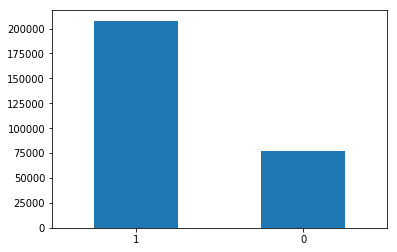

In [21]:
df_Ohio.sentiment.value_counts().plot(kind="bar", rot=0)

Nice customers, Good business, and not bad distribution.

In [22]:
df_Ohio.to_csv ('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv', index = None, header=True) 

Now, we get the data that we want!

In [23]:
import pandas as pd
data=pd.read_csv('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv')

data.head()

,business_id,stars,text,state,text_cleaned,sentiment
0,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1
2,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1
3,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0
4,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1


## 2. Text Analytics 

In [4]:
x_data = data['text_cleaned']
y_data = data['sentiment']
#Separate into train and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [11]:
# import logging
# logging.root.handlers = []  # Jupyter messes up logging so needs a reset
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# from smart_open import smart_open

from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

C:\Users\hopen\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2019-05-10 08:29:46,021 : INFO : 'pattern' package not found; tag filters are not available for English


In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

# Add the models to the list that you want to view on the ROC plot
vectorizers = [
    {'label': 'Bag of Words',   
     'vectorizer': CountVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,
                                   preprocessor=None, stop_words='english', max_features=3000) ,},
    {'label': 'TF-IDF',         
     'vectorizer': TfidfVectorizer(min_df=2, tokenizer=nltk.word_tokenize,
                                  preprocessor=None, stop_words='english'),},    
]

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Add the models to the list that you want to view on the ROC plot
models = [
           {'label': 'Logistic Regression',                 'model': LogisticRegression(n_jobs=1, C=1e5),},
           {'label': 'Naive Bayes Classifier ',             'model': MultinomialNB(),},
#            {'label': 'Linear Support Vector Machine',       'model': SGDClassifier(loss='log'),},
#            {'label': 'Linear Support Vector Machine',       'model': SGDClassifier(loss='modified_huber'),},
           {'label': 'Random Forest',         'model': RandomForestClassifier(),},    
           {'label': 'Gradient Boosting',     'model': GradientBoostingClassifier(),},
]

It looks a lot of code here. I could encapsulate them to a good-looking format. However, we could see how the data transfers in these code. In other words, I thought it is more readable, so I keep all here.

BTW, at the beginning, I looped models first and then looped the vectorizers, which means I need to vectorize the train data and test data 3 times than now, what a fool I was!!

------------ Bag of Words ------------
---- Logistic Regression 


C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.9393981985780714
Confusion matrix:
[[19905  3164]
 [ 2010 60298]]
Normalized Confusion matrix:
[[0.86284624 0.13715376]
 [0.0322591  0.9677409 ]]
---- Naive Bayes Classifier  
Test accuracy is 0.897161999133256
Confusion matrix:
[[18730  4339]
 [ 4441 57867]]
Normalized Confusion matrix:
[[0.81191209 0.18808791]
 [0.07127496 0.92872504]]
---- Random Forest 
Test accuracy is 0.892734577228059
Confusion matrix:
[[18197  4872]
 [ 4286 58022]]
Normalized Confusion matrix:
[[0.78880749 0.21119251]
 [0.06878731 0.93121269]]
---- Gradient Boosting 
Test accuracy is 0.8630310270916055
Confusion matrix:
[[12562 10507]
 [ 1187 61121]]
Normalized Confusion matrix:
[[0.54454029 0.45545971]
 [0.01905052 0.98094948]]
------------ TF-IDF ------------
---- Logistic Regression 


C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.9143680382304368
Confusion matrix:
[[19546  3523]
 [ 3788 58520]]
Normalized Confusion matrix:
[[0.84728423 0.15271577]
 [0.06079476 0.93920524]]
---- Naive Bayes Classifier  
Test accuracy is 0.8932967895334809
Confusion matrix:
[[15307  7762]
 [ 1348 60960]]
Normalized Confusion matrix:
[[0.66353115 0.33646885]
 [0.02163446 0.97836554]]
---- Random Forest 
Test accuracy is 0.8913758974899563
Confusion matrix:
[[16805  6264]
 [ 3010 59298]]
Normalized Confusion matrix:
[[0.72846677 0.27153323]
 [0.0483084  0.9516916 ]]
---- Gradient Boosting 
Test accuracy is 0.8643545685606193
Confusion matrix:
[[12736 10333]
 [ 1248 61060]]
Normalized Confusion matrix:
[[0.55208288 0.44791712]
 [0.02002953 0.97997047]]


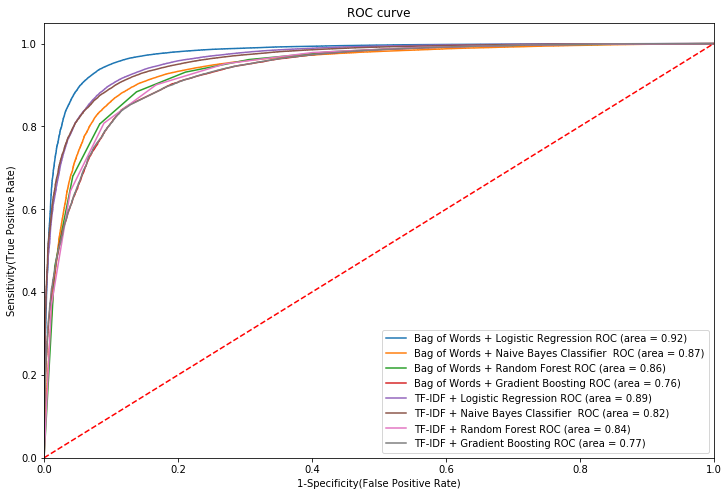

In [57]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Below for loop iterates through your models list
for v in vectorizers:
    # train the vectorizer
    print('------------ %s ------------' % v['label'].upper())
    vectorizer = v['vectorizer']
    train_data_features = vectorizer.fit_transform(x_train)    
    # use the vectorizer to transfor x_test into vecotr
    test_data_features = vectorizer.transform(x_test)    
    for m in models:
        # train the model and predict y_pred
        print('---- %s ' % m['label'])
        model = m['model'] 
        model = model.fit(train_data_features, y_train)
        y_pred = model.predict(test_data_features)
        
        #  print out model evaluation
        print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred)))
        conf_mat =confusion_matrix(y_test,y_pred)
        print("Confusion matrix:\n%s" % conf_mat)
        conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion matrix:\n%s" % conf_mat_norm)

        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(test_data_features)[:,1])
        # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict(test_data_features))
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s + %s ROC (area = %0.2f)' % (v['label'], m['label'], auc))
    
    
    
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()   # Display

Until now, our project is done. We use BOW and TF-IDF to change the text into vector, so in this way the model could be trained, and finally we got good predictions.

# Bonus!  

## Word2Vec + Keras/Xgboost 

Fancy Word2Vec, Fabulous Keras, and Fantastic Xgboost!

First, use Word2Vec to vectorize the text, but before that we need change the text in to word tokens first. 

In [ ]:
#libraries for NLP and doc2vec modeling
import gensim
import gensim.models.doc2vec
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from collections import namedtuple
import nltk
from nltk.corpus import stopwords
from ast import literal_eval

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

data['text_cleaned_token'] = data['text_cleaned'].apply(tokenize_text)

data.to_csv ('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv', index = None, header=True) 
data.head()

In [14]:
data = pd.read_csv('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv')
data['text_cleaned_token'] = data['text_cleaned_token'].apply(literal_eval)

In [18]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags sentiment')
alldocs=[]

for i in range(len(data)):             
    words = data['text_cleaned_token'][i]
#     words = data['text_cleaned']
    tags = [i]
    sentiment = data['sentiment'][i] 
    alldocs.append(SentimentDocument(words,tags,sentiment))

In [19]:
from random import shuffle
doc_list = alldocs[:]  
shuffle(doc_list)

In [21]:
import multiprocessing

# assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise"
vec_model_1 = Doc2Vec(dm=1,dm_concat=1,vector_size=80, window=6, min_count=3, negtive = 5, 
                      hs=0, sample=0, epochs=50, workers=(multiprocessing.cpu_count()-1))
vec_model_1.build_vocab(doc_list)
vec_model_1.train(doc_list, total_examples=len(doc_list), epochs=vec_model_1.epochs)
vec_model_1.save('model_store_1.model')


vec_model_0 = Doc2Vec(dm=0,vector_size=80, window=6, min_count=3, negtive = 5, 
                      hs=0, sample=0, epochs=50, workers=(multiprocessing.cpu_count()-1))
vec_model_0.build_vocab(doc_list)
vec_model_0.train(doc_list, total_examples=len(doc_list), epochs=vec_model_0.epochs)
vec_model_0.save('model_store_0.model')

In [ ]:
vec_model_1 = Word2Vec.load("model_store_1.model")
vec_model_0 = Word2Vec.load("model_store_0.model")

In [40]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
vec_model = ConcatenatedDoc2Vec([vec_model_0,vec_model_1])

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (doc_list,random_state =100, test_size =0.2, shuffle =True)

X_train_vec= [vec_model.docvecs[doc.tags[0]] for doc in train_set]
X_test_vec = [vec_model.docvecs[doc.tags[0]] for doc in test_set]
y_train = [doc.sentiment for doc in train_set]
y_test = [doc.sentiment for doc in test_set]

X_train_vec = np.array(X_train_vec)
X_test_vec = np.array(X_test_vec)
y_train = np.array(y_train)
y_test = np.array(y_test)

Now, we completed the word vectorization using Word2Vec.<br />
Next, start try our deep learning model and boosting model. 

Test accuracy is 0.9375065884254542
Confusion matrix:
[[13396  2063]
 [ 1494 39965]]
Normalized Confusion matrix:
[[0.86655023 0.13344977]
 [0.0360356  0.9639644 ]]


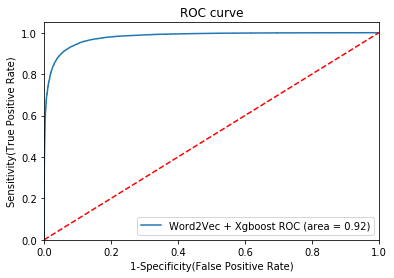

In [62]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, 
                      gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', 
                      nthread=4, scale_pos_weight=1)
model.fit(X_train_vec, y_train)
y_pred=model.predict(X_test_vec)


print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred)))
conf_mat =confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n%s" % conf_mat)
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion matrix:\n%s" % conf_mat_norm)


plt.figure()

# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_vec)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test_vec))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s + %s ROC (area = %0.2f)' % ('Word2Vec', 'Xgboost', auc))
        
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()   # Display

In [63]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=160))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_vec, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.1)

score = model.evaluate(X_test_vec, y_test, batch_size=128, verbose=2)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 204904 samples, validate on 22768 samples
Epoch 1/10
 - 20s - loss: 0.1608 - acc: 0.9374 - val_loss: 0.1469 - val_acc: 0.9433
Epoch 2/10
 - 18s - loss: 0.1425 - acc: 0.9463 - val_loss: 0.1471 - val_acc: 0.9442
Epoch 3/10
 - 23s - loss: 0.1346 - acc: 0.9499 - val_loss: 0.1499 - val_acc: 0.9452
Epoch 4/10
 - 25s - loss: 0.1273 - acc: 0.9533 - val_loss: 0.1538 - val_acc: 0.9458
Epoch 5/10
 - 17s - loss: 0.1203 - acc: 0.9560 - val_loss: 0.1522 - val_acc: 0.9455
Epoch 6/10
 - 26s - loss: 0.1134 - acc: 0.9598 - val_loss: 0.1528 - val_acc: 0.9459
Epoch 7/10
 - 23s - loss: 0.1072 - acc: 0.9626 - val_loss: 0.1478 - val_acc: 0.9437
Epoch 8/10
 - 22s - loss: 0.1010 - acc: 0.9653 - val_loss: 0.2034 - val_acc: 0.9375
Epoch 9/10
 - 22s - loss: 0.0963 - acc: 0.9678 - val_loss: 0.1871 - val_acc: 0.9416
Epoch 10/10
 - 25s - loss: 0.0907 - acc: 0.9703 - val_loss: 0.2192 - val_acc: 0.9400
Test score: 0.23793342152560745
Test accuracy: 0.936259179839289


Look! Word2Vec + Keras/Xgboost are much better than previous combinations. Until now, I have used most popular Vectorization methods nad models including Logistic Regression, Random Forest, boosting tree, deep neural network and Xgboost. I learned way more than I thought before, and I believe this is a good start! In the future, I would learn more about these models and force more on Model tuning parameter and the design of layer in deep learning. 

Thank you for time to read my project.

## Reference

Finally, Thanks these blogs or codes, they help me really a lot. I am really appreciate that these authors show their thoughts all the time, which also should be learned. I listed them here, and hope they would be helpful for you, too. <br />

https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568  <br />
https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4 <br />
https://medium.com/district-data-labs/modern-methods-for-sentiment-analysis-694eaf725244 <br />
https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb <br />
https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/ipynb_with_output/Document%20classification%20with%20word%20embeddings%20tutorial%20-%20with%20output.ipynb <